In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR  # <-- Add this line
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
data = pd.read_csv("/content/Advertising.csv")  # Replace with actual file path

In [17]:
print(data.head())

#missing values
print(data.isnull().sum())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [18]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [19]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

In [21]:
results = {}

In [22]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "RMSE": rmse, "R²": r2}

    print(f"\n{name} Performance (Train-Test Split):")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")


Linear Regression Performance (Train-Test Split):
Mean Squared Error: 3.17
Root Mean Squared Error: 1.78
R² Score: 0.8994

Decision Tree Performance (Train-Test Split):
Mean Squared Error: 1.54
Root Mean Squared Error: 1.24
R² Score: 0.9514

Random Forest Performance (Train-Test Split):
Mean Squared Error: 0.59
Root Mean Squared Error: 0.77
R² Score: 0.9813

Gradient Boosting Performance (Train-Test Split):
Mean Squared Error: 0.53
Root Mean Squared Error: 0.73
R² Score: 0.9831

Support Vector Regressor Performance (Train-Test Split):
Mean Squared Error: 4.01
Root Mean Squared Error: 2.00
R² Score: 0.8731

Neural Network (MLP) Performance (Train-Test Split):
Mean Squared Error: 13.79
Root Mean Squared Error: 3.71
R² Score: 0.5630


In [23]:
#DataFrame for visualization
results_df = pd.DataFrame(results).T

In [24]:
#cross validation
cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 5-Fold Cross Validation
    cv_scores[name] = {"Mean R²": np.mean(scores), "Std Dev": np.std(scores)}

cv_results_df = pd.DataFrame(cv_scores).T

<ipython-input-25-7f20d6b44306>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R²"], palette="viridis")


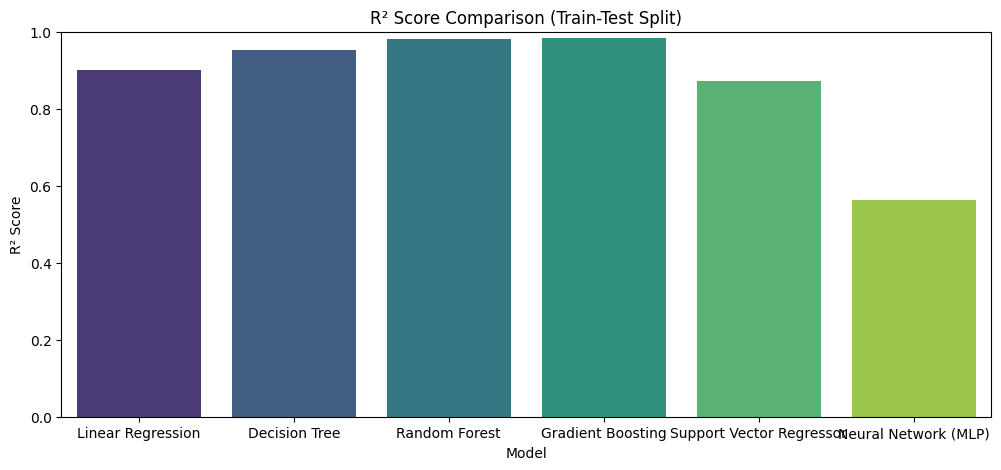

In [25]:
plt.figure(figsize=(12, 5))
sns.barplot(x=results_df.index, y=results_df["R²"], palette="viridis")
plt.title("R² Score Comparison (Train-Test Split)")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.show()

<ipython-input-26-9aad8060c828>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cv_results_df.index, y=cv_results_df["Mean R²"], palette="coolwarm")


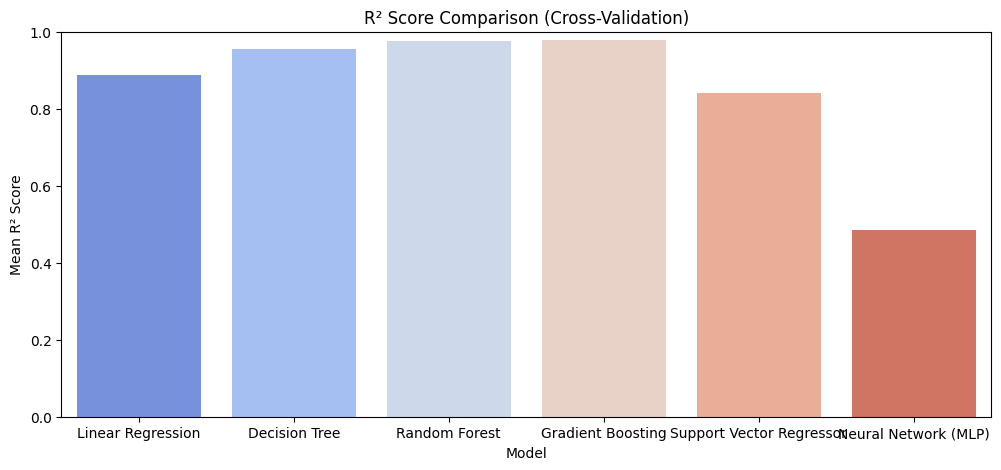

In [26]:
plt.figure(figsize=(12, 5))
sns.barplot(x=cv_results_df.index, y=cv_results_df["Mean R²"], palette="coolwarm")
plt.title("R² Score Comparison (Cross-Validation)")
plt.xlabel("Model")
plt.ylabel("Mean R² Score")
plt.ylim(0, 1)
plt.show()

<ipython-input-27-ec05f9b12d5e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")


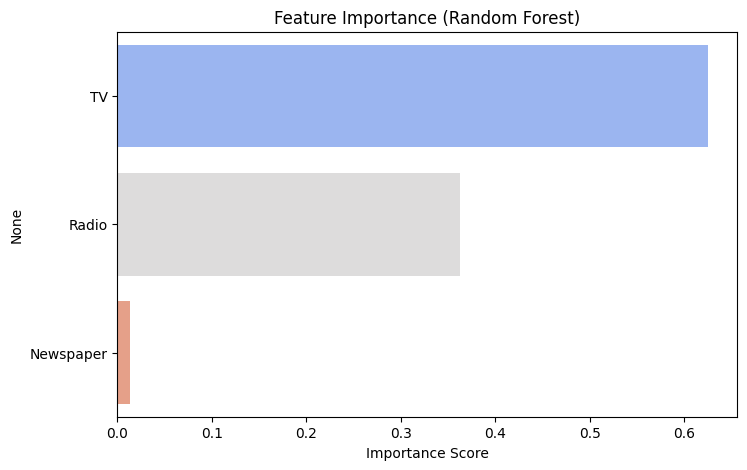

In [27]:
rf_model = models["Random Forest"]
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

In [28]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [29]:
print(f"\nBest Parameters for Random Forest: {grid_search.best_params_}")
print(f"Best R² Score from Grid Search: {grid_search.best_score_:.4f}")


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score from Grid Search: 0.9701


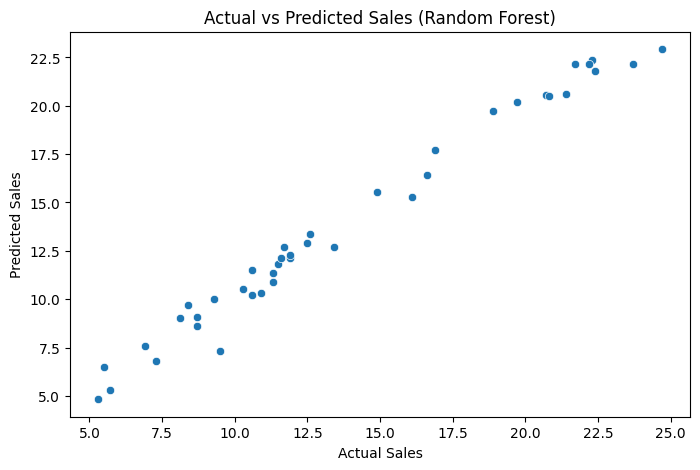

In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=models["Random Forest"].predict(X_test))
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.show()